# Assignment 4 - Unsupervised Learning and Neural Networks

## SRISHTI SAHA
Netid: ss1078

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

# Learning objectives
Through completing this assignment you will be able to...
1. Apply clustering techniques to a variety of datasets with diverse distributional properties, gaining an understanding of their strengths and weaknesses and how to tune model parameters.
2. Apply PCA and t-SNE for performing dimensionality reduction and data visualization
3. Understand how PCA represents data in lower dimensions and understand the concept of data compression.
4. Build, tune the parameters of, and apply feedforward neural networks to data
5. Develop a detailed understanding of the math and practical implementation considerations of neural networks, one of the most widely used machine learning tools.

## 1

### [35 points] Clustering

Clustering can be used to reveal structure between samples of data and assign group membership to similar groups of samples. This exercise will provide you with experience building a basic clustering algorithm to provide insight into the structure of these techniques, then compare a number of clustering techniques on a distinctive datasets to experience the pros and cons of these approaches.

**(a)** Implement your own k-means algorithm. For a measure of dissimilarity use the sum of squared error of the Euclidean distance from each point to the cluster mean. Initialize your means by selecting a set of $k$ points at random from your dataset and using those values as the initial means. You may need to run your algorithm multiple times with different initializations (picking the clustering with the lower dissimilarity measure) to get the best results. You may use the template below to assist you in your implementation. 

**ANSWER**

**Part (a)**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import figure
import io
import requests
import seaborn as sns
from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics import silhouette_score
import time
import warnings
from sklearn import cluster, datasets, mixture
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

C:\Users\srish\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [167]:
def compute_sse(X, k, clusters, centers_new):
    sse = np.zeros(X.shape[0])
    for i in range(k):
        sse[clusters == i] = np.linalg.norm(X[clusters == i] - centers_new[i], axis=1)
    return np.sum(np.square(sse))

def kmeans(X, k, max_steps=100, convergence_threshold=1e-6):
    '''kmeans
    
        Input:
            X: matrix of input data where each row represents a sample
            k: number of means to use
            max_steps: maximum number of iterations to run the algorithm
            convergence_threshold: if the means change less than this
                                   value in an iteration, declare convergence
        Output:
            means: a matrix listing the k means
            cluster_assignment: a list of the cluster assignments for each samples
            dissimilarity: sum of squared error of the Euclidean distance from each point to the cluster mean
    '''
    # Number of training data
    n = X.shape[0]
    # Number of features in the data
    c = X.shape[1]

    # Generate random centers, here we use sigma and mean to ensure it represent the whole data
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    np.random.seed(15)
    centers = np.random.randn(k,c)*std + mean
    
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = np.copy(centers) # Store new centers

    clusters = np.zeros(n)
    distance = np.zeros((n,k))
    sse = np.zeros(n)

    change = (np.linalg.norm(centers_new - centers_old))
    
    for iteration in range(max_steps):
        while change >= convergence_threshold:
            for i in range(k):
                #print(X[clusters==i].shape)
                #print(np.unique(clusters))
                distance[:,i] = np.square(np.linalg.norm(X - centers_new[i], axis=1))
            # Assign all training data to closest center
            clusters = np.argmin(distance, axis = 1)

            centers_old = np.copy(centers_new)
            # Calculate mean for every cluster and update the center
            for i in range(k):
                centers_new[i] = np.mean(X[clusters == i], axis=0)
            change = (np.linalg.norm(centers_new - centers_old))
            
    sse = compute_sse(X, k, clusters, centers_new)
            
    return (centers_new, clusters,sse)

**(b)** Demo your algorithm. Create some data to cluster by using the `blobs` module from `scikit-learn` to construct two datasets: one with 2 cluster centers and the other with 5. Set the `random_state` keyword parameter to 0 in each to ensure the datasets are consistent with the rest of the class and generate 5,000 samples of each dataset. For each dataset rerun your k-means algorithm for values of $k$ ranging from 1 to 10 and for each plot the "elbow curve" where you plot dissimilarity in each case. For your two datasets, where is the elbow in the curve and why? Plot the data and your $k$-means for the optimal value of $k$ that you determined from the elbow curve.

**(c)** Ensure your understanding of how clustering methods work. Briefly explain in 1-2 sentences each (at a very high level) how the following clustering techniques work and what distinguishes them from other clustering methods: (1) k-means, (2) agglomerative clustering, (3) Gaussian mixture models, (4) DBSCAN, and (5) spectral clustering.

**(d)** Apply clustering algorithms to diverse datasets. For each of the clustering algorithms in (c) run each of them on the five datasets below. Tune the parameters in each model to achieve better performance for each dataset. Plot the final result as a 4-by-5 subplot showing the resulting clustering of each method on each dataset. Which method works best or worst on each dataset and why? (This can be 1-2 sentences for each dataset). The datasets are:
- Aggregation.txt
- Compound.txt
- D31.txt
- jain.txt

Each file has three columns: the first two are $x_1$ and $x_2$, then the third is a suggested cluster label (ignore this third column - do NOT include this in your analysis). *The data are from https://cs.joensuu.fi/sipu/datasets/*.

*Note: for k-means, use the `scikit-learn` module rather than your own*

**Part (b)**

In [8]:
X1, y1 = make_blobs(n_samples=5000, centers=2, n_features=2,random_state=0)
#print(X1.shape)

X2, y2 = make_blobs(n_samples=5000, centers=5, n_features=2,random_state=0)
#print(X2.shape)

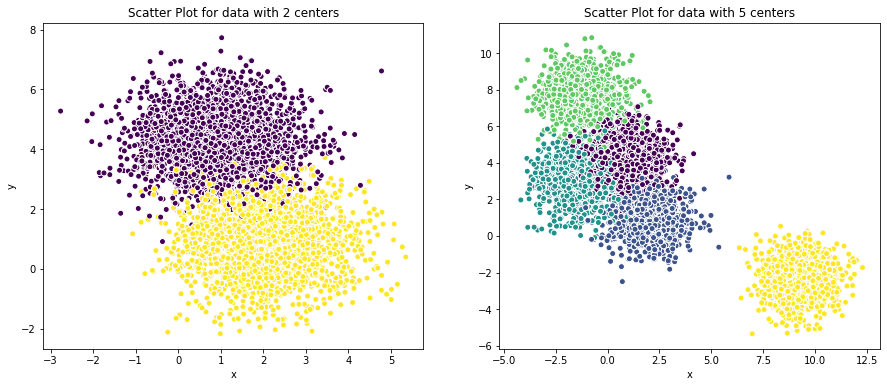

In [9]:
# plotting to represent data on a 2D space
fig, ax = plt.subplots(1,2,figsize=(15,6))
ax[0].scatter(X1[:, 0], X1[:, 1], marker='o', c=y1, edgecolor='white')
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[0].set_title("Scatter Plot for data with 2 centers")
ax[1].scatter(X2[:, 0], X2[:, 1], marker='o', c=y2, edgecolor='white')
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].set_title("Scatter Plot for data with 5 centers")
plt.show()

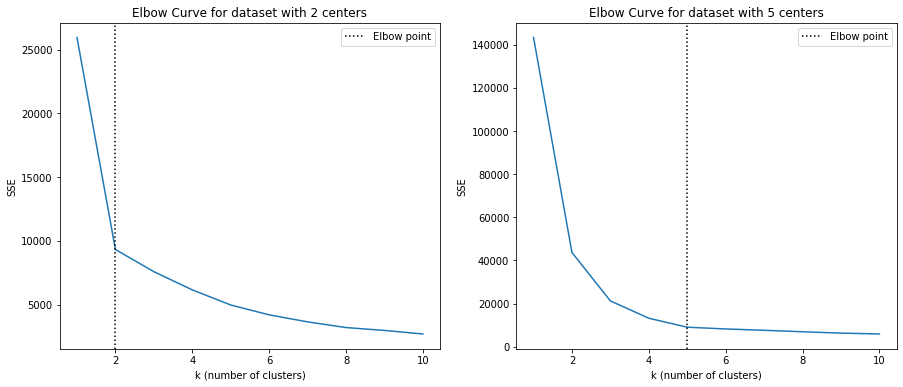

In [162]:
fig, ax = plt.subplots(1,2,figsize=(15,6))
k_array= [1,2,3,4,5,6,7,8,9,10]
sses1=[]
sses2=[]
for k in range(1,11):
    results1=kmeans(X1, k, max_steps=100, convergence_threshold=1e-6)
    sse1=results1[2]
    sses1.append(sse1)
    results2=kmeans(X2, k, max_steps=100, convergence_threshold=1e-6)
    sse2=results2[2]
    sses2.append(sse2)

# data with 2 centers
ax[0].plot(k_array,sses1)
ax[0].axvline(2, color='black', ls=':',label="Elbow point")
ax[0].set_xlabel("k (number of clusters)")
ax[0].set_ylabel("SSE")
ax[0].legend()
ax[0].set_title("Elbow Curve for dataset with 2 centers")

# data with 5 centers
ax[1].plot(k_array,sses2)
ax[1].axvline(5, color='black', ls=':',label="Elbow point")
ax[1].set_xlabel("k (number of clusters)")
ax[1].set_ylabel("SSE")
ax[1].legend()
ax[1].set_title("Elbow Curve for dataset with 5 centers")
plt.show()

The elbow curve for the first dataset (with 2 centers) is at 2 as the rate of drop of SSE after that point is faily lower as compared to the rest of the graph. The curve at this point follows a fairly sharp bend above. Similarly, the elbow for the second dataset with 5 centers can be seen at k=5 as the SSE vs no. of clusters curve becomes relatively flat after that point (k=5). Ths is where the rate of drop of SSE has stabilized.

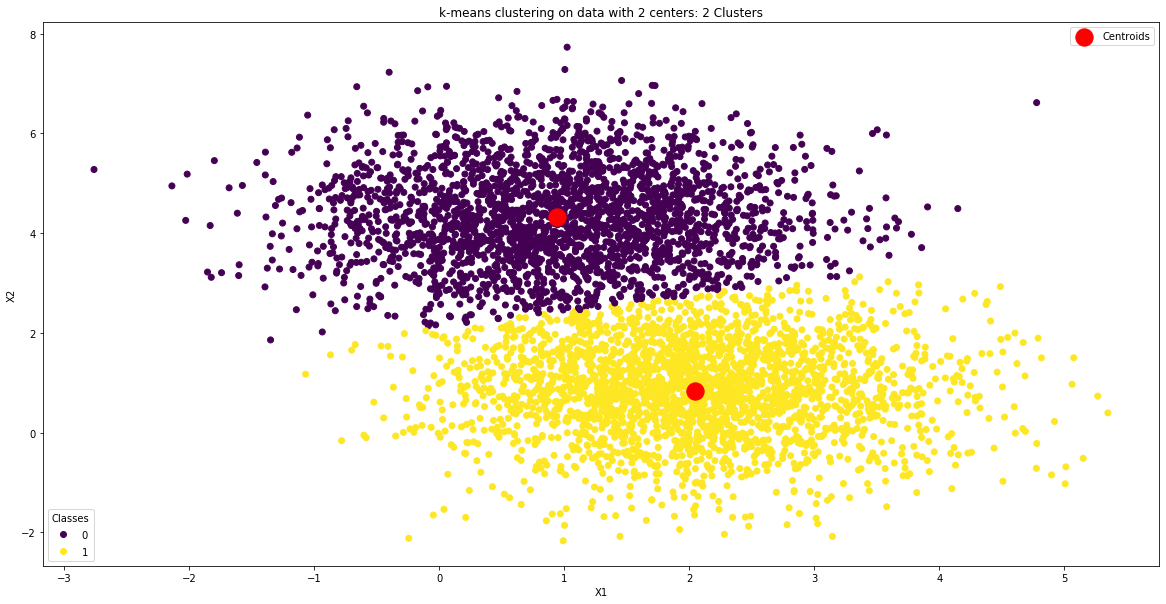

In [190]:
######################################### Data with 2 centers ########################################################
# plotting output of k-means clustering
K = 2
Kmeans=kmeans(X1,K)
centroids, clusters,sse=Kmeans


#plt.figure(figsize = (20,10))
fig, ax = plt.subplots(figsize = (20,10))

scatter=ax.scatter(X1[:, 0], X1[:, 1],c=clusters)
ax.scatter(centroids[:,0],centroids[:,1],s=300,c='red',label='Centroids')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.title('k-means clustering on data with 2 centers: 2 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

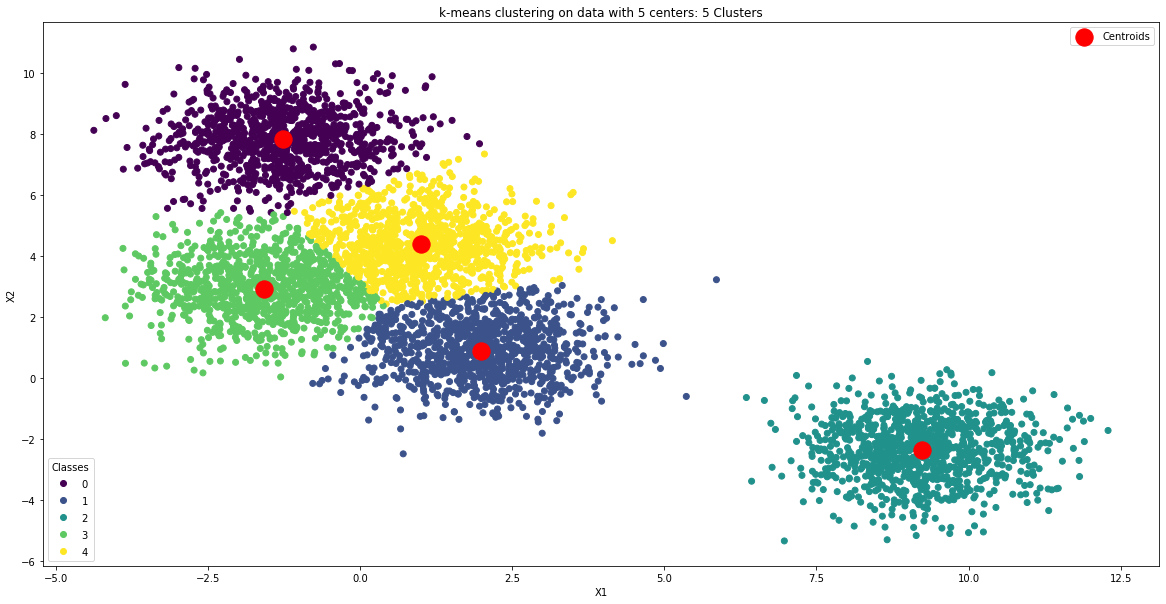

In [188]:
######################################### Data with 5 centers ########################################################
# plotting output of k-means clustering
K = 5
Kmeans=kmeans(X2,K)
centroids, clusters,sse=Kmeans


#plt.figure(figsize = (20,10))
fig, ax = plt.subplots(figsize = (20,10))

scatter=ax.scatter(X2[:, 0], X2[:, 1],c=clusters)
ax.scatter(centroids[:,0],centroids[:,1],s=300,c='red',label='Centroids')
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.title('k-means clustering on data with 5 centers: 5 Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

**(c) Clustering Techniques:**

***k-means***

The k-means algorithm computes a distance/dissimilarity metric like Euclidean distance between randomly-initialized centroids and the data points, and then goes through a reiterative process to minimize this distance to correctly assign clusters and in that process, finds the most appropriate centroid for that cluster. The aim is to find *k* number of centers which is defined by a hyperparameter, so that the set of closest points in the feature space are at the minimum distance from each other. 

k-means clustering works best when the data is linearly separable. It works well with nearly circular clusters which have equal variance and a similar size and density. The number of clusters has to be fed as an input and thus the algorithm might create 'k' clusters even when there are no k clusters. The iterative process of converging at minimum distance and finding a center for each cluster after random initialization makes the k-means algorithm different from other algorithms. 

***Agglomerative clustering***

The agglomerative clustering approach is hierarchical clustering that assigns each data point to its own individual cluster, and then merges the closest pair of clusters based on their proximity, in a greedy approach. 

It performs the best when the clusters are well-separated i.e has a large intercluster distance. The algorithm can be slow due the multiple pairwise distances being computed. This is a bottom-up tree-based method that can be represented using a dendogram, which sets it apart from other forward-moving clustering algorithms. 

***Gaussian mixture models***

Gaussian mixture models are a distribution-based clustering algorithm that follow a probabilistic model that assumes all the data points are generated from multiple Gaussian distributions with unknown parameters. 

GMMs perform well with clusters with variation in cluster variance and correlation as well as clusters with equal variance. However, it struggles when the clusters do not follow the Gaussian distribution. The advantage of this algorithm is that it works well with clusters that are shaped differently which is one major point of difference as compared to other algorithms. Moreover, it is based on a Gaussian distribution which is also a differentiating factor. 

***DBSCAN***

DBSCAN is a density-based clustering algorithm that produces  partitional clustering. It starts with forming shapes around data-points and labels them as core, border or density on the basis of the density of data around it. The noise points are omitted. The remaining surrounding data points are then grouped into arbitrarily-shaped clusters using the distance measure $\epsilon$.

It performs well with arbitrarily-shaped clusters but falters when there is significant variation in cluster density. This method does not use the number of clusters as a hyperparameter and instead uses a $\epsilon$, or the distance between points as a hyperparameter. Thus, it is better at handling outliers in the clusters and does not force-fit a certain number of clusters as many other methods do. 

***Spectral clustering***

The spectral clustering algorithm is often used in a low-dimensional space and works based on data similarity. It creates a graph of the datapoints and then calculates the eigenvectors of the Laplacian matrix to project the data to a lower dimension. The classes are separated using another algorithm like k-means. 

Since it makes fewer assumptions about the data at hand, it often produces good clustering results and focuses on connectedness of data points to form clusters which sets it apart from other algorithms. 


**Part (d)**

In [11]:
url1='http://cs.joensuu.fi/sipu/datasets/Aggregation.txt'
url2='http://cs.joensuu.fi/sipu/datasets/Compound.txt'
url3='http://cs.joensuu.fi/sipu/datasets/D31.txt'
url4='http://cs.joensuu.fi/sipu/datasets/jain.txt'

In [12]:
s=requests.get(url1).content
aggregation=pd.read_table(io.StringIO(s.decode('utf-8')), usecols=[0,1],names=('x1', 'x2'))
s=requests.get(url2).content
compound=pd.read_table(io.StringIO(s.decode('utf-8')), usecols=[0,1],names=('x1', 'x2'))
s=requests.get(url3).content
d31=pd.read_table(io.StringIO(s.decode('utf-8')), usecols=[0,1],names=('x1', 'x2'))
s=requests.get(url4).content
jain=pd.read_table(io.StringIO(s.decode('utf-8')), usecols=[0,1],names=('x1', 'x2'))

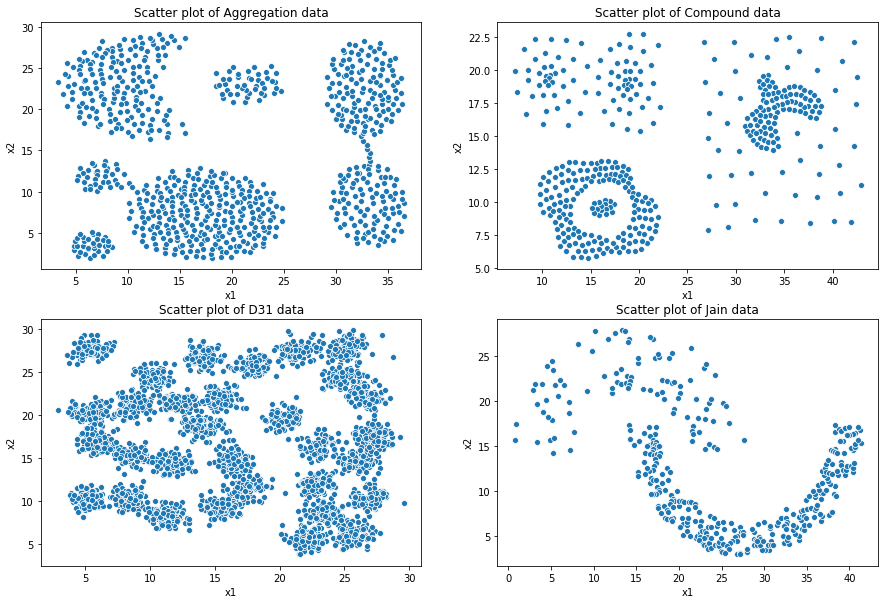

In [198]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.scatterplot('x1', 'x2',data=aggregation, ax=ax[0, 0])
ax[0, 0].set_title('Scatter plot of Aggregation data')

sns.scatterplot('x1', 'x2',data=compound, ax=ax[0, 1])
ax[0, 1].set_title('Scatter plot of Compound data')

sns.scatterplot('x1', 'x2',data=d31, ax=ax[1, 0])
ax[1, 0].set_title('Scatter plot of D31 data')

sns.scatterplot('x1', 'x2',data=jain, ax=ax[1, 1])
ax[1, 1].set_title('Scatter plot of Jain data')
plt.show()

#### Selection of value of k from Elbow Curves for K-means clustering:

In [194]:
# storing SSEs for k-means clusetering on each dataset
sses1 = []
sses2 = []
sses3 = []
sses4 = []
sses= [sses1,sses2,sses3,sses4]

names=['Aggregation','Compound','D31','Jain']

df_array=[aggregation,compound,d31,jain]
for i in range(4):
    if names[i]=='D31':
        # exception for D31 due to the huge size of dataset and shapes in the sctater plot above
        K = range(1,35)
    else:
        K = range(1,12)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(df_array[i])
        sses[i].append(kmeanModel.inertia_)

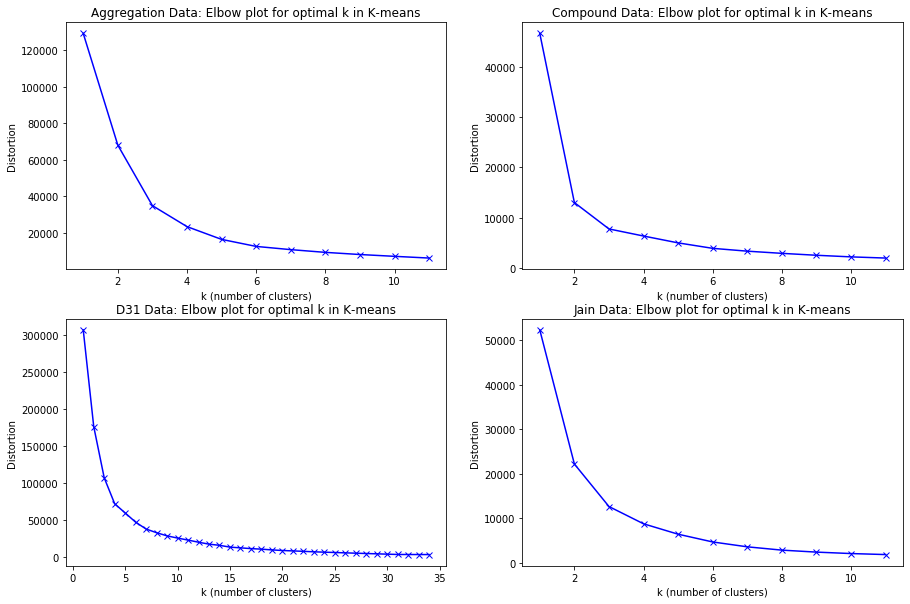

In [195]:
# plotting elbow plots for each dataset


fig, ax = plt.subplots(2,2,figsize=(15,10))

####### Aggregation data
ax[0,0].plot(K, sses[0], 'bx-')
ax[0,0].set_xlabel('k (number of clusters)')
ax[0,0].set_ylabel('Distortion')
ax[0,0].set_title('Aggregation Data: Elbow plot for optimal k in K-means')

####### Compound data
ax[0,1].plot(K, sses[1], 'bx-')
ax[0,1].set_xlabel('k (number of clusters)')
ax[0,1].set_ylabel('Distortion')
ax[0,1].set_title('Compound Data: Elbow plot for optimal k in K-means')

####### D31 data
K2 = range(1,35)
ax[1,0].plot(K2, sses[2], 'bx-')
ax[1,0].set_xlabel('k (number of clusters)')
ax[1,0].set_ylabel('Distortion')
ax[1,0].set_title('D31 Data: Elbow plot for optimal k in K-means')

####### Jain data
ax[1,1].plot(K, sses[3], 'bx-')
ax[1,1].set_xlabel('k (number of clusters)')
ax[1,1].set_ylabel('Distortion')
ax[1,1].set_title('Jain Data: Elbow plot for optimal k in K-means')
plt.show()

***Selection of value of k from Elbow Curves for K-means clustering:***

From the elbow curve, the optimal number of clusters for *Aggregation* dataset looks like 7. For *Compound* data, we will select the optimal value of k as 3. For *D31*, we see a slight elbow at k=20 and for the *Jain* dataset, a sharp elbow can be seen at k=2 or 3. From the shape of the data, we will take k=2 for this dataset. Let us try to fit clsuters with these values.

#### Selection of value of k from Dendograms for Agglomerative Hierarchical clustering (and GMMs and Spectral Clustering):

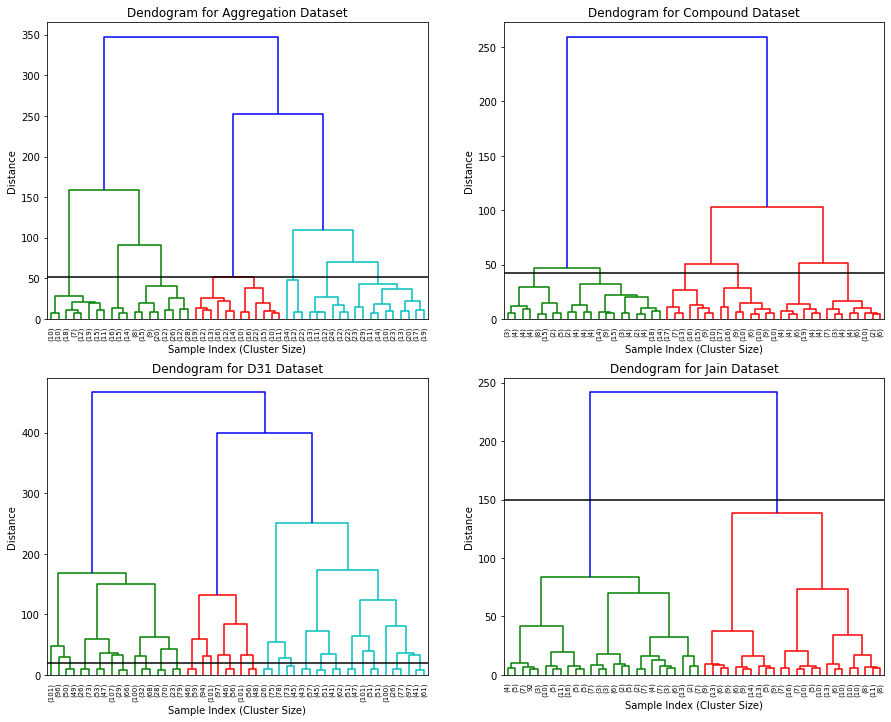

In [192]:
# plotting dendograms for each dataset

####### Aggregation data
fig, ax = plt.subplots(2,2,figsize=(15,12))
linked = linkage(df_array[0], 'ward') 
dendrogram(linked,
            ax=ax[0,0],
            orientation='top',
            distance_sort='descending',
            truncate_mode='lastp',  # show only the last p merged clusters
            p=50,  # show only the last p merged clusters
            leaf_rotation=90.,
            leaf_font_size=7.,
            show_leaf_counts=True)
ax[0,0].axhline(y=52, c='k')
ax[0,0].set_xlabel('Sample Index (Cluster Size)')
ax[0,0].set_ylabel('Distance')
ax[0,0].set_title('Dendogram for Aggregation Dataset')

####### Compound data
linked = linkage(df_array[1], 'ward') 
dendrogram(linked,
           ax=ax[0,1],
            orientation='top',
            distance_sort='descending',
            truncate_mode='lastp',  # show only the last p merged clusters
            p=50,  # show only the last p merged clusters
            leaf_rotation=90.,
            leaf_font_size=7.,
            show_leaf_counts=True)
ax[0,1].axhline(y=42, c='k')
ax[0,1].set_xlabel('Sample Index (Cluster Size)')
ax[0,1].set_ylabel('Distance')
ax[0,1].set_title('Dendogram for Compound Dataset')

####### D31 data
linked = linkage(df_array[2], 'ward') 
dendrogram(linked,
           ax=ax[1,0],
            orientation='top',
            distance_sort='descending',
            truncate_mode='lastp',  # show only the last p merged clusters
            p=50,  # show only the last p merged clusters
            leaf_rotation=90.,
            leaf_font_size=7.,
            show_leaf_counts=True)
ax[1,0].axhline(y=20, c='k')
ax[1,0].set_xlabel('Sample Index (Cluster Size)')
ax[1,0].set_ylabel('Distance')
ax[1,0].set_title('Dendogram for D31 Dataset')

####### Jain data
linked = linkage(df_array[3], 'ward') 
dendrogram(linked,
           ax=ax[1,1],
            orientation='top',
            distance_sort='descending',
            truncate_mode='lastp',  # show only the last p merged clusters
            p=50,  # show only the last p merged clusters
            leaf_rotation=90.,
            leaf_font_size=7.,
            show_leaf_counts=True)
ax[1,1].axhline(y=150, c='k')
ax[1,1].set_xlabel('Sample Index (Cluster Size)')
ax[1,1].set_ylabel('Distance')
ax[1,1].set_title('Dendogram for Jain Dataset')
plt.show()

***Selection of value of k from Dendograms for Agglomerative clustering (and GMMs and Spectral Clustering):***

From the dendograms, we will consider the following values of k for the following datasets:

1. for aggregation data: k is 7
2. for compound data: k is 6
3. for D31 data: k is 31
4. for Jain data: k is 2

We will keep the same values for Gaussian Mixture Models and Spectral Clustering. We will tune the other parameters.

In [196]:
# Apply all clustering methods discussed to each of these 4 datasets

aggr_models = []
comp_models = []
d31_models = []
jain_models = []


################### K-means ############################
aggr_models.append(KMeans(7).fit_predict(aggregation))
comp_models.append(KMeans(5).fit_predict(compound))
d31_models.append(KMeans(31).fit_predict(d31))
jain_models.append(KMeans(2).fit_predict(jain))

################### Hierarchical Agglomerative ############################
aggr_models.append(AgglomerativeClustering(7).fit_predict(aggregation))
comp_models.append(AgglomerativeClustering(6).fit_predict(compound))
d31_models.append(AgglomerativeClustering(31).fit_predict(d31))
jain_models.append(AgglomerativeClustering(2, linkage="average", affinity='l2').fit_predict(jain))

################### GMM ############################
aggr_models.append(GaussianMixture(n_components=7, covariance_type='full').fit_predict(aggregation))
comp_models.append(GaussianMixture(n_components=6, covariance_type='diag').fit_predict(compound))
d31_models.append(GaussianMixture(n_components=31, covariance_type='full').fit_predict(d31))
jain_models.append(GaussianMixture(n_components=2, covariance_type='tied').fit_predict(jain))

################### DBSCAN ############################
aggr_models.append(DBSCAN(eps=1.8, min_samples=11).fit_predict(aggregation))
comp_models.append(DBSCAN(eps=1.485, min_samples=3).fit_predict(compound))
d31_models.append(DBSCAN(eps=0.68, min_samples=8).fit_predict(d31))
jain_models.append(DBSCAN(eps=2.3, min_samples=15).fit_predict(jain))

################### Spectral Clustering ############################
aggr_models.append(SpectralClustering(n_clusters=7).fit_predict(aggregation))
comp_models.append(SpectralClustering(n_clusters=6).fit_predict(compound))
d31_models.append(SpectralClustering(n_clusters=31).fit_predict(d31))
jain_models.append(SpectralClustering(n_clusters=2).fit_predict(jain))

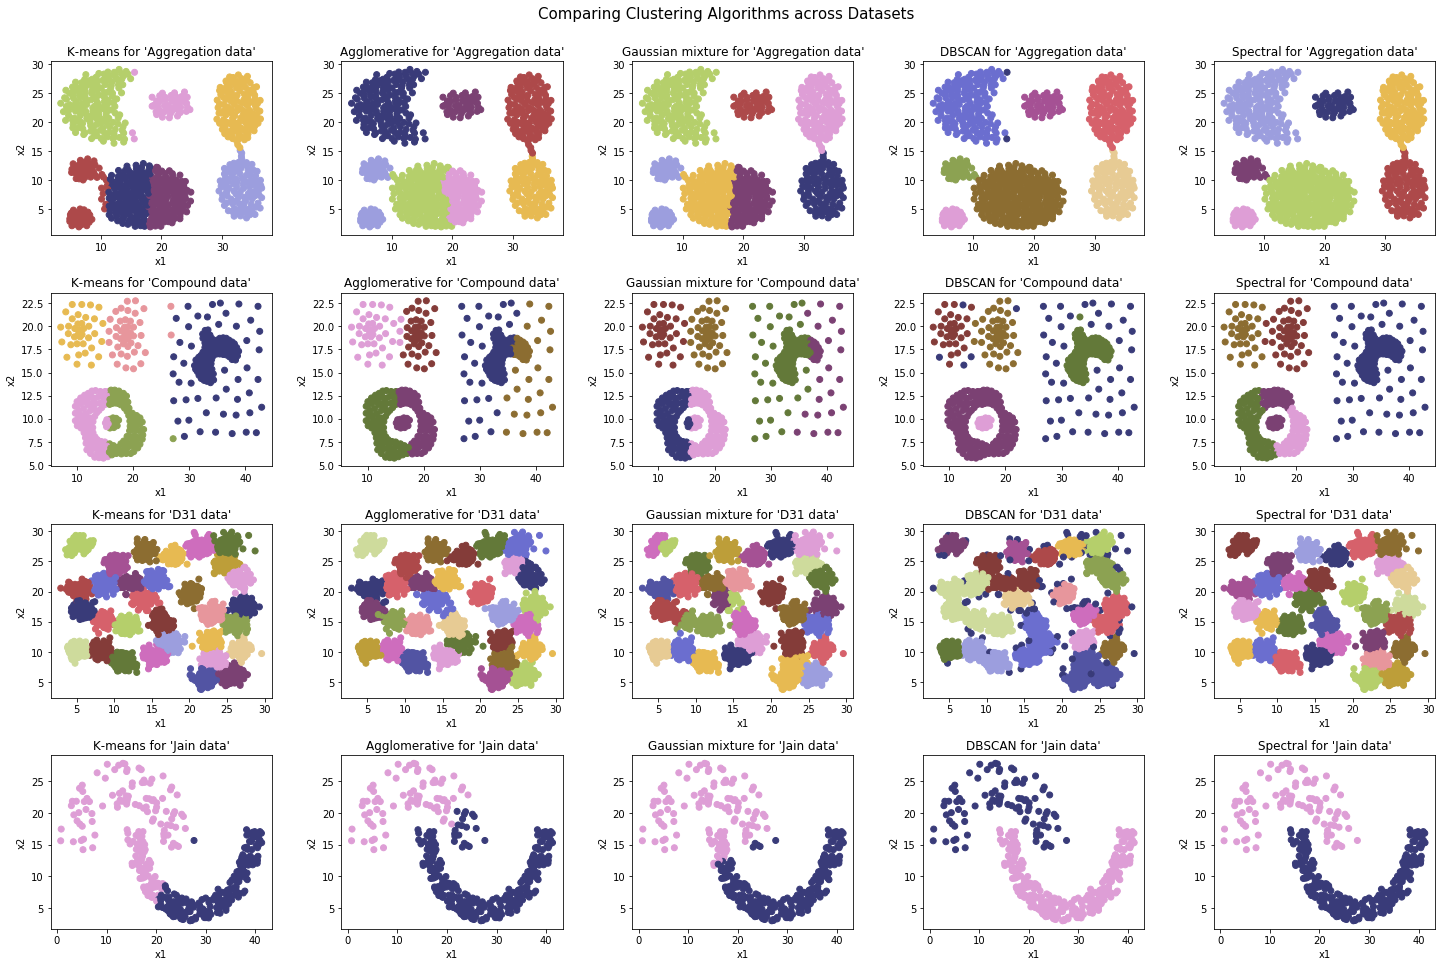

In [160]:
# plot results of clustering on each of these datasets
model_name = ["K-means", "Agglomerative", "Gaussian mixture", "DBSCAN", "Spectral"]


plt.figure(figsize=(20, 13))
i = 1
for aggr_clusters, comp_clusters, d31_clusters, jain_clusters in zip(aggr_models, comp_models, d31_models, jain_models):
    ####### Aggregation data
    plt.subplot(4, 5, i)
    plt.scatter(aggregation['x1'], aggregation['x2'], c=aggr_clusters, cmap="tab20b")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("{} for 'Aggregation data'".format(model_name[(i % 5) - 1]))

    ####### Compound data
    plt.subplot(4, 5, 5+i)
    plt.scatter(compound['x1'], compound['x2'], c=comp_clusters, cmap="tab20b")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("{} for 'Compound data'".format(model_name[(i % 5) - 1]))

    ####### D31 data
    plt.subplot(4, 5, 10+i)
    plt.scatter(d31['x1'], d31['x2'], c=d31_clusters, cmap="tab20b")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("{} for 'D31 data'".format(model_name[(i % 5) - 1]))
    
    ####### Jain data
    plt.subplot(4, 5, 15+i)
    plt.scatter(jain['x1'], jain['x2'], c=jain_clusters, cmap="tab20b")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("{} for 'Jain data'".format(model_name[(i % 5) - 1]))

    i = i + 1
    
plt.suptitle('Comparing Clustering Algorithms across Datasets', fontsize=15, y=1.03)
plt.tight_layout()

**EXPLANATIONS FPR THE ABOVE OBSERVATIONS**:

For **Aggregation data**: Spectral Clustering seems to work the best closely followed by DBSCAN clustering. This is because DBSCAN does not require the data to follow a spherical shape and Spectral clustering makes fewer assumptions about the data. Among the two algorithms above, spectral clustering is slower in computation. However, k-means performs poorly as it does not work well with data with different variances and non-spherical cluster shapes. Agglomerative Clustering and GMMs do not perform too well on this dataset either. 

For **Compound data**: DBSCAN has performed fairly well in this case, especially in the clusters in the lower left area of the plots and the clusters with varying densities on the right part of the plots. This is clearly because it works well with non-spherical cluster shapes and is a density-based clustering technique which could separate the data based on its density.For the other two clusters on the top-left corner of the plots, almost all models have performed well. Gaussian Mixture model and kmeans work particularly well because these clusters are faily spherical and follow a Gaussian centered distribution with similar covariances. Agglomerative clustering does not work well with this kind of data because of lack of clear separation between the clusters.

For **D31 data**: Almost all models can separate the clusters fairly well in this dataset as the clusters are faily similar shaped and have similar variances. As DBSCAN is density-based it is unable to separate all the clusters that are closely placed to each other. It also eliminates a few points on the borders as noise based on the density and distance parameters. Due to the large amount of data in this dataset, spectral clustering in noticeable slow in its performance.

For **Jain data**: Spectral clustering outperforms other algorithms to form clusters in this dataset because it focusses on the connectedness of the clusters instead of the compactness of the same. DBSCAN has also performed well in differentiating the two clusters as it works well with varying densities and non-spherical cluster shapes which are present in this dataset. Since this dataset does not have spherical clusters, a clear centroid or a Gaussian distribution, K-means and GMMs fail in this case. Agglomerative clustering underperforms as the clusters are not well-separated.

## 2

### [20 points] Dimensionality reduction and visualization of digits with PCA and t-SNE

**(a)** Reduce the dimensionality of the data with PCA for data visualization. Load the `scikit-learn` digits dataset. Apply PCA and reduce the data (with the associated cluster labels 0-9) into a 2-dimensional space. Plot the data with labels in this two dimensional space (labels can be colors, shapes, or using the actual numbers to represent the data - definitely include a legend in your plot).

**(b)** Create a plot showing the cumulative fraction of variance explained as you incorporate from $1$ through all $D$ principal components of the data (where $D$ is the dimensionality of the data). What fraction of variance in the data is UNEXPLAINED by the first two principal components of the data? Briefly comment on how this may impact how well-clustered the data are. *You can use the `explained_variance_` attribute of the PCA module in `scikit-learn` to assist with this question*

**(c)** Reduce the dimensionality of the data with t-SNE for data visualization. T-distributed stochastic neighborhood embedding (t-SNE) is a nonlinear dimensionality reduction technique that is particularly adept at embedding the data into lower 2 or 3 dimensional spaces. Apply t-SNE to the digits dataset and plot it in 2-dimensions (with associated cluster labels 0-9). You may need to adjust the parameters to get acceptable performance. You can read more about how to use t-SNE effectively [here](https://distill.pub/2016/misread-tsne/).

**(d)** Compare/contrast the performance of these two techniques. Which seemed to cluster the data best and why? *Note: You typically will not have labels available in most problems.*

**ANSWER**

In [21]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

**Part (a)**

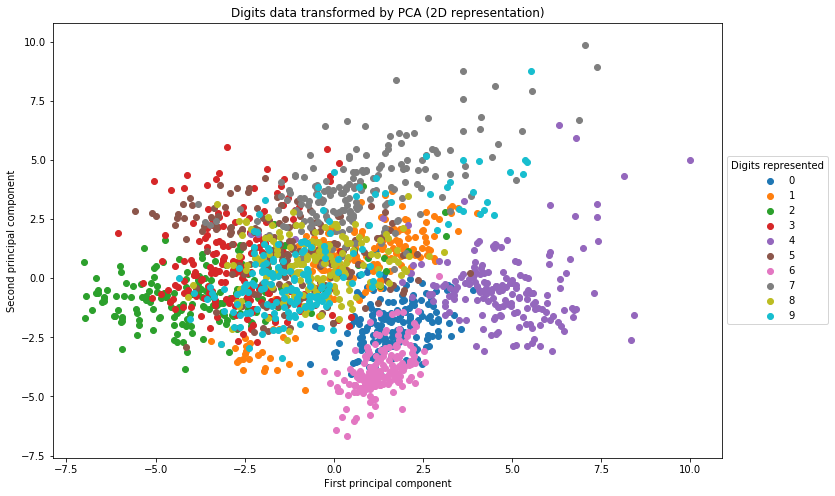

In [20]:
# load MNIST digits data and assign target and features separately
mnist = datasets.load_digits()
digits = mnist.data
labels = mnist.target

# normalization of digits daya
scaler = StandardScaler()
scaler.fit(digits)
digits_normalized = scaler.transform(digits)

# assign data to a dataframe
features = [ 'pixel'+str(i) for i in range(digits_normalized.shape[1]) ]
df = pd.DataFrame(digits_normalized,columns=features)
df['label'] = labels
df['label'] = df['label'].apply(lambda i: str(i))

# apply PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(df[features].values)

df['pca-one'] = pca_res[:,0]
df['pca-two'] = pca_res[:,1] 

# Plot the PCA transformed data on a 2D space
plt.figure(figsize=(12,8))
for i in range(10):
    pca_res_i = pca_res[labels == i, :]
    plt.scatter(pca_res_i[:, 0], pca_res_i[:, 1], label="{}".format(i))

# Put a legend to the right of the current axis
plt.legend(loc='center left',title= 'Digits represented', bbox_to_anchor=(1, 0.5))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("Digits data transformed by PCA (2D representation)")
plt.show()

**Part (b)**

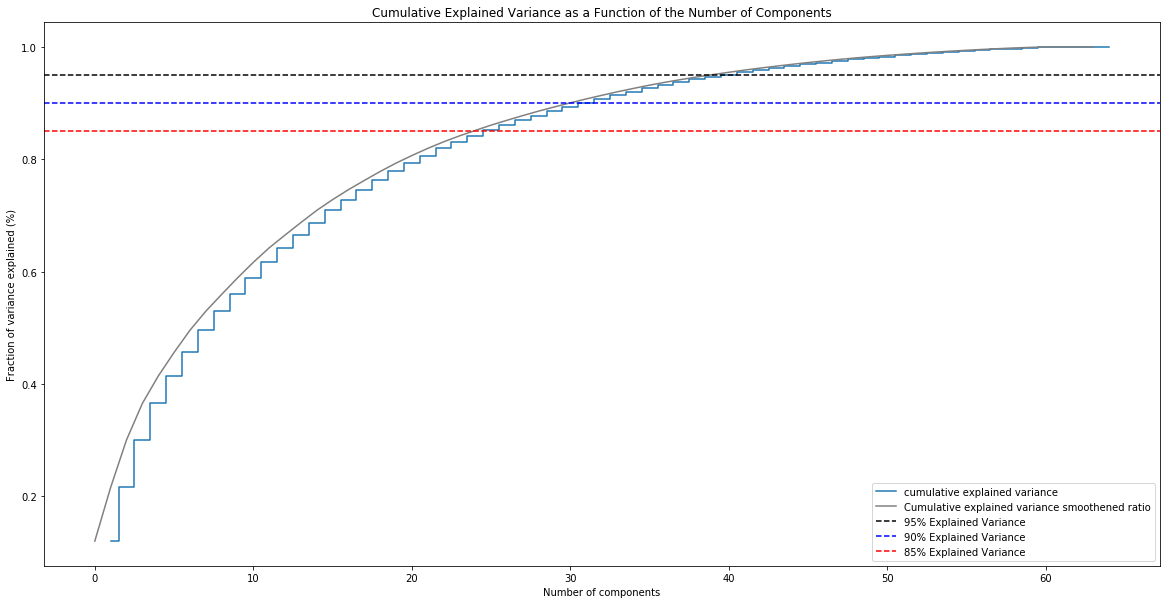

In [197]:
pca= PCA()
pca_fit= pca.fit(df[features].values)

# Compute fraction of variance explained and cumulative sum
totals = sum(pca_fit.explained_variance_)
var_exp = [(i/totals) for i in sorted(pca_fit.explained_variance_, reverse=True)] 
cum_var_exp = np.cumsum(var_exp)

# Plot
plt.figure(figsize=(20, 10))
plt.step(range(1, 65), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Fraction of variance explained (%)')
plt.xlabel('Number of components')
plt.plot(np.cumsum(pca_fit.explained_variance_ratio_),color= 'gray', label = 'Cumulative explained variance smoothened ratio')
plt.axhline(y = .95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = .90, color='b', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = .85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

In [74]:
# explained variance
pca = PCA(n_components=2)
pca_fit= pca.fit(df[features].values)
exp_variance=pca_fit.explained_variance_ratio_ 

#unexplained variance
print('Thus unexplained variance after first 2 principal components is:',(1-sum(exp_variance)))

Thus unexplained variance after first 2 principal components is: 0.7840502950494542


In [140]:
print('Explained variance from 2 PCs is:',sum(exp_variance))

Explained variance from 2 PCs is: 0.2159497049505458


Since 78.4% of the variance is still unexplained, the two selected principal components are unable to distinguish the data points in separable clusters as te information in the distribution is not completely captured. 

In PCA, the first principal component describes the direction of the maximum spread of data while the second gives the direction of maximum spread perpendicular to the direction of the 1st PC. However, in our given dataset, these components are not enough to capture the residual information (~78%) which is significant to separate the datapoints into different clear clusters.

**Part (c)**

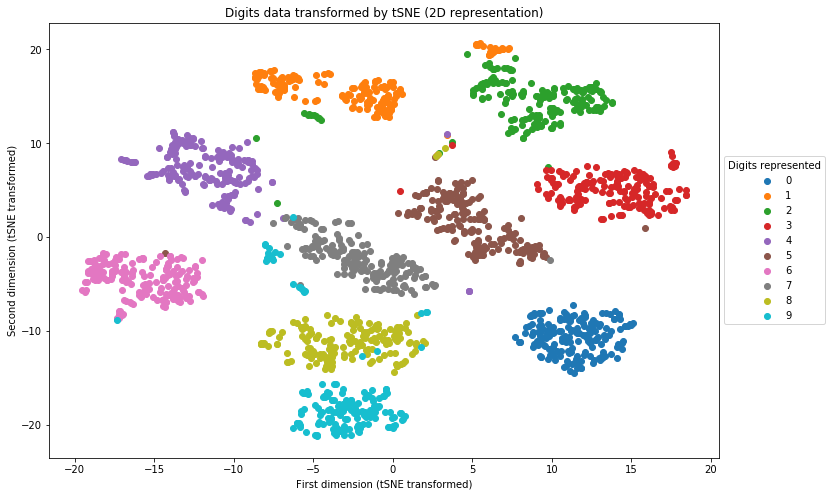

In [23]:
# apply tSNE to MNIST digits data
tsne = TSNE(n_components=2, learning_rate=500, perplexity=40, n_iter=300)
tsne_res = tsne.fit_transform(df.values)

df_tsne = df.copy()
df_tsne['x-tsne'] = tsne_res[:,0]
df_tsne['y-tsne'] = tsne_res[:,1]

# Plot the TSNE transformed data on a 2D space
plt.figure(figsize=(12,8))
for i in range(10):
    tsne_res_i = tsne_res[labels == i, :]
    plt.scatter(tsne_res_i[:, 0], tsne_res_i[:, 1], label="{}".format(i))
# Put a legend to the right of the current axis
plt.legend(loc='center left',title= 'Digits represented', bbox_to_anchor=(1, 0.5))
plt.xlabel("First dimension (tSNE transformed)")
plt.ylabel("Second dimension (tSNE transformed)")
plt.title("Digits data transformed by tSNE (2D representation)")
plt.show()

**Part (d)**

From the scatter plots above, we see that tSNE is a better method to cluster data as the PCA transformed data is not separated at all. This might be because tSNE is better at handling non-linear data and transforms data into somewhat circular cluster like shapes based on their similarity. 
On the other hand, PCA does not seperate the digits-data and the transformed data looks like 1 big cluster. PCA cannot handle non-linear data and works well with linear data. There are a few cases in the above plot where PCA separates a few digits like '4' and '6' from the rest. However, there is an overlap for the other digits.

For the above dataset, tSNE is a better clustering algorithm than PCA.

However, tSNE is more computationally expensive than PCA. Moreover, tSNE needs to be retrained and fit everytime unobserved data has been added to the dataset while PCA can transform the data that is not present in the orginal dataset. This might limit the algorithms' scalability and efficiency.

## 3

### [45 points] Build and test your own Neural Network for classification

There is no better way to understand how one of the core techniques of modern machine learning works than to build a simple version of it yourself. In this exercise you will construct and apply your own neural network classifier. You may use numpy if you wish but no other libraries.

**(a)** Create a neural network class that follows the `scikit-learn` classifier convention by implementing `fit`, `predict`, and `predict_proba` methods. Your `fit` method should run backpropagation on your training data using stochastic gradient descent. Assume the activation function is a sigmoid. Choose your model architecture to have two input nodes, two hidden layers with five nodes each, and one output node.

To guide you in the right direction with this problem, please find a skeleton of a neural network class below. You absolutely MAY use additional methods beyond those suggested in this template, but I see these methods as the minimum required to implement the model cleanly.

One of the greatest challenges of this implementations is that there are many parts and a bug could be present in any of them. I would strongly encourage you to create unit tests for most modules. Without doing this will make your code extremely difficult to bug. You can create simple examples to feed through the network to validate it is correctly computing activations and node values. Also, if you manually set the weights of the model, you can even calculate backpropagation by hand for some simple examples (admittedly, that unit test would be challenging, but a unit test is possible). You can also verify the performance of your overall neural network by comparing it against the `scikit-learn` implementation and using the same architecture and parameters as your model.

**(b)** Apply your neural network. Create a training and validation dataset using `sklearn.datasets.make_moons(N, noise=0.20)`, where $N_{train} = 500$ and $N_{test} = 100$. Train and test your model on this dataset plotting your learning curves (training and validation error for each epoch of stochastic gradient descent, where an epoch represents having trained on each of the training samples one time). Adjust the learning rate and number of training epochs for your model to improve performance as needed. In two subplots, plot the training data on one subplot, and the validation data on the other subplot. On each plot, also plot the decision boundary from your neural network trained on the training data. Report your performance on the test data with an ROC curve and compare against the `scikit-learn` `MLPClassifier` trained with the same parameters.

**(c)** Suggest two ways in which you neural network implementation could be improved.

**ANSWER**

**Part (a)**

In [3]:
import sklearn
from math import floor
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

In [4]:
class construct_layer:
    # This class will be used to construct layers which will then be aded to the neural net
    def __init__(self, last_nodes, current_nodes, act_fn, act_prime):
        self.W = np.random.randn(current_nodes, last_nodes)*np.sqrt(2/last_nodes)
        self.activation = act_fn
        self.derive = act_prime
        pass

In [44]:
def sigmoid(z):
    '''sigmoid
    Compute the sigmoid function for each value in matrix X
        Input:
            X: A matrix of any size [m x n]
        Output:
            X_sigmoid: A matrix [m x n] where each entry corresponds to the
                       entry of X after applying the sigmoid function
    '''
    # Apply sigmoid activation function
    return (1/(1+np.exp(-z)))


def sigmoid_derivative(z):
    # derivative of sigmoid or sigmoid_prime
    return (np.multiply((sigmoid(z)) , np.subtract(1,sigmoid(z))))

def prediction_error(y, y_hat):
    # y_hat is predictions
    return (0.5) * (y - y_hat) ** 2

def prediction_accuracy(y,y_hat):
    # how many values were correctly predicted
    n = len(y)
    return (sum(y == y_hat) / n)

def decay_learnrate(decay, iter):
    return (1. / (1. + decay * iter))

def accuracy(y,y_hat):
    # prediction accuracy
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

class myNeuralNetwork(object):
    debug = True # for print statement
    def __init__(self):
        self.layers = []
        pass

    def add(self, layer):
        # add a constructed layer to the neural network
        self.layers.append(layer)


    def forward_propagation(self, X):
        
        '''forward_propagation
        Takes a vector of your input data (one sample) and feeds
        it forward through the neural network, calculating activations and
        layer node values along the way.
            Input:
                x: a vector of data represening 1 sample [n_in x 1]
            Output:
                y_hat: a vector (or scaler of predictions) [n_out x 1]
                (typically n_out will be 1 for binary classification)
        '''
        n_layers = len(self.layers)
        z_list = [X.T]

        # 1st hidden layer
        a = self.layers[0].W.dot(X.T) 
        z = self.layers[0].activation(a)
        z_list.append(z)

        for i in range(1, n_layers):
            a = self.layers[i].W.dot(z) 
            z = self.layers[i].activation(a)
            z_list.append(z)
            pass

        return z_list

    def predict_proba(self, X):
        # simply take output of forward propagate
        pred_prob= self.forward_propagation(X)[-1].T
        return pred_prob
    
    def backpropagate(self, X, y):
        '''backpropagate
        Backpropagate the error from one sample determining the gradients
        with respect to each of the weights in the network. The steps for
        this algorithm are:
            1. Run a forward pass of the model to get the activations 
               Corresponding to x and get the loss functionof the model 
               predictions compared to the target variable y
            2. Compute the deltas (see lecture notes) and values of the
               gradient with respect to each weight in each layer moving
               backwards through the network
    
            Input:
                x: A vector of 1 samples of data [n_in x 1]
                y: Target variable [scalar]
            Output:
                loss: a scalar measure of th loss/cost associated with x,y
                      and the current model weights
        '''
        z_list = self.forward_propagation(X)
        n_layers = len(self.layers)

        derivations = []
        a_k = self.layers[-1].W.dot(z_list[-2])
        deriv = (z_list[-1] - y) * self.layers[-1].derive(a_k)
        derivations = [deriv] + derivations 

        for j in range(n_layers - 2, -1, -1): 
            a_j = self.layers[j].W.dot(z_list[j])
            deriv = self.layers[j].derive(a_j) * (self.layers[j + 1].W.T.dot(deriv))
            derivations = [deriv] + derivations
            pass

        w_changes = []
        w_changes.append(derivations[0].dot(X))  
        #print('printing w_changes:',w_changes)
        for i in range(1, n_layers):  
            w_changes.append(derivations[i].dot(z_list[i].T)) 
            pass
        return w_changes

    def fit(self, X, y, batch_size, learning_rate=0.1, epochs=1000, is_decay=False, decay_steps=100, decay_coef=0.0):
        n_layers = len(self.layers)
        n = len(y)
        errors_store=[]
        for epoch in range(epochs):

            if is_decay == True and epoch % decay_steps == 0:
                learning_rate *= decay_learnrate(decay_coef, epoch / decay_steps) # optional step
                print("learning rate after decay: {}".format(round(learning_rate,4)))

            # BATCH DESCENT
            if batch_size == n:
                w_changes = self.backpropagate(X, y)
                for i in range(n_layers):
                    self.layers[i].W = self.layers[i].W - (learning_rate / n) * w_changes[i]
            # SGD
            else:
                shuffle = np.arange(n)
                np.random.shuffle(shuffle)
                X = X[shuffle]
                y = y[shuffle]
                num_batches = floor(n / batch_size)
                remains = n % batch_size
                remain_X, remain_y = X[n - remains:n], y[n - remains:n]
                for batch_i in range(num_batches):
                    w_changes = self.backpropagate(X[batch_i*batch_size: (batch_i+1)*batch_size], 
                                                       y[batch_i*batch_size: (batch_i+1)*batch_size])
                    for i in range(n_layers):
                        self.layers[i].W = self.layers[i].W - (learning_rate / n) * w_changes[i]
                if remains != 0:
                    w_changes = self.backpropagate(remain_X,remain_y)
                    for i in range(n_layers):
                        self.layers[i].W = self.layers[i].W - (learning_rate / n) * w_changes[i]
                pass
            #print("epoch {}: , cost = {}".format(epoch, np.average(prediction_error(y, self.predict_proba(X).reshape(n)))))
            errors_store.append(np.average(prediction_error(y, self.predict_proba(X).reshape(n))))
        return errors_store

    def predict(self, X, thresh=0.5):
        # binary classification
        # default threshold is 0.5
        binary_op = np.where(self.predict_proba(X) < thresh, 0, 1)
        return binary_op

In [45]:
# creating neural network of given specs: two input nodes, two hidden layers with five nodes each, and one output node.

nn = myNeuralNetwork()
ncols=3

# construct and add layers to neural network
nn.add(construct_layer(ncols, 5, act_fn=sigmoid, act_prime=sigmoid_derivative))
nn.add(construct_layer(5, 5, act_fn=sigmoid, act_prime=sigmoid_derivative))
nn.add(construct_layer(5, 5, act_fn=sigmoid, act_prime=sigmoid_derivative))
nn.add(construct_layer(5, 1, act_fn=sigmoid, act_prime=sigmoid_derivative))

**Part (b)**

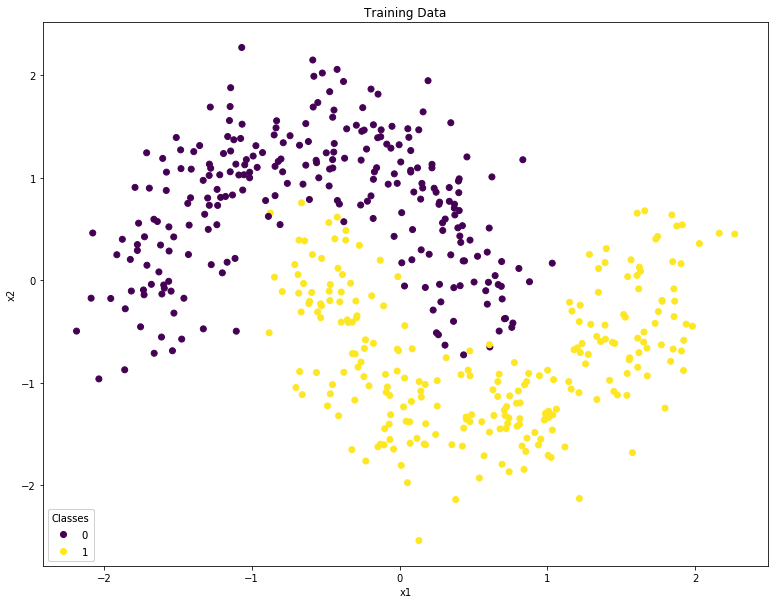

In [46]:
# make moons data- 600 samples
X,y = make_moons(n_samples=600,noise=0.2)

#test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/6)
# standardize
mean = X_train.mean(axis=0)
sd = X_train.std(axis=0)
X_train = (X_train - mean) / sd
X_test = (X_test - mean) / sd

# bias terms in input only
X_train = np.column_stack((np.ones(len(X_train)),X_train))
X_test = np.column_stack((np.ones(len(X_test)),X_test))


# plot training data
fig, ax = plt.subplots(figsize = (13,10))
plt.title('Training Data')
plt.xlabel('x1')
plt.ylabel('x2')
scatter=ax.scatter(X_train[:,1],X_train[:,2],c=y_train.flatten())
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),loc="lower left", title="Classes")
ax.add_artist(legend1)
plt.show()

In [47]:
# predictions before train
preds_before_train = nn.predict(X_train, thresh=0.5).reshape(len(y_train))

# fit the neural network to train data
###################################### learning rate: 0.5 and epochs= 5000 ##############################
results_nn=nn.fit(X_train, y_train, batch_size=len(y_train), epochs=5000, learning_rate=0.5)

# predictions after train
preds_train = nn.predict(X_train, thresh=0.5).reshape(len(y_train))

#### Learning Curve

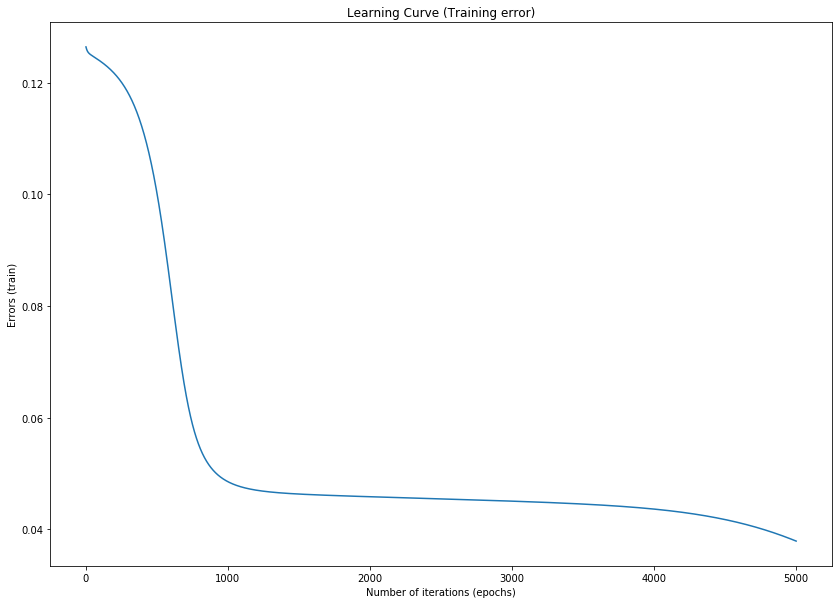

In [56]:
epochs_for_fit=list(range(1,5001))
fig = plt.figure(figsize=(14, 10))
plt.plot(epochs_for_fit,results_nn)
plt.xlabel("Number of iterations (epochs)")
plt.ylabel("Errors (train)")
plt.title("Learning Curve (Training error)")
plt.show()

In [9]:
print("cost before train: {}, accuracy: {}".
      format(np.average(prediction_error(y_train, preds_before_train)), prediction_accuracy(y_train, preds_before_train)))
print("cost after train: {}, accuracy: {}".
      format(np.average(prediction_error(y_train, preds_train)), prediction_accuracy(y_train, preds_train)))

cost before train: 0.248, accuracy: 0.504
cost after train: 0.07, accuracy: 0.86


In [10]:
preds_test = nn.predict(X_test, thresh=0.5)
print("test cost: {}, accuracy: {}".format(np.average(prediction_error(y_test, preds_test)), prediction_accuracy(y_test, preds_test.ravel())))

test cost: 0.249, accuracy: 0.85


#### Scatter Plots with Decision Boundary

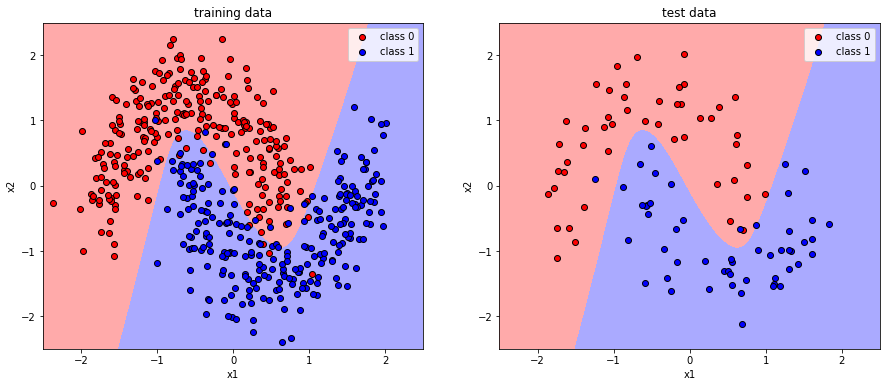

In [42]:
h = 0.02
# for decision boundary
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
x1 = np.linspace(-2.5, 2.5, 300)
x2 = np.linspace(-2.5, 2.5, 300)
xx, yy = np.meshgrid(x1, x2)
X_mesh = np.column_stack((np.ones(len(xx.ravel())),xx.ravel(), yy.ravel()))
preds_mesh = nn.predict_proba(X_mesh)
fig, ax = plt.subplots(1,2,figsize=(15,6))

ax[0].contourf(xx, yy, preds_mesh.reshape(xx.shape), cmap=cmap_light)
ax[0].scatter(X_train[y_train == 0][:, 1], X_train[y_train == 0][:, 2], c="red",edgecolors="black", label="class 0")
ax[0].scatter(X_train[y_train == 1][:, 1], X_train[y_train == 1][:, 2], c="blue",edgecolors="black", label="class 1")
ax[0].set_title("training data")
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")
ax[0].set_xlim(xx.min(), xx.max())
ax[0].set_ylim(yy.min(), yy.max())
ax[0].legend()

# Test data
preds_test = nn.predict(X_test, thresh=0.5)

ax[1].contourf(xx, yy, preds_mesh.reshape(xx.shape), cmap=cmap_light)
ax[1].scatter(X_test[y_test == 0][:, 1], X_test[y_test == 0][:, 2], c="red", edgecolors="black", label="class 0")
ax[1].scatter(X_test[y_test == 1][:, 1], X_test[y_test == 1][:, 2], c="blue", edgecolors="black", label="class 1")
ax[1].legend()
ax[1].set_title("test data")
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x2")
ax[1].set_xlim(xx.min(), xx.max())
ax[1].set_ylim(yy.min(), yy.max())
plt.show()

#### ROC curves

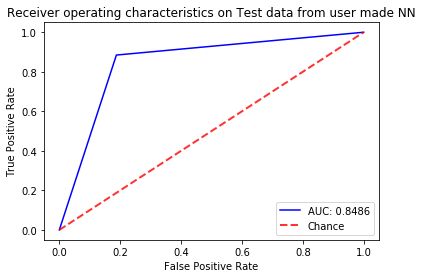

In [15]:
# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds_test.ravel())
plt.plot(fpr, tpr, color='b', label="AUC: {:.4}".format(metrics.roc_auc_score(y_test, preds_test)))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics on Test data from user made NN')
plt.show()

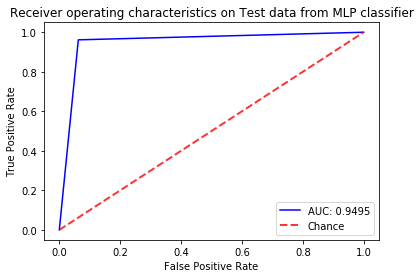

In [37]:
# fitting the MLP classifier from sklearn
# same parameters as user-defined class: learning rate: 0.5 and epochs= 5000
clf=MLPClassifier(alpha=0.5, max_iter=5000)
clf.fit(X_train, y_train)
clf_preds_test= clf.predict(X_test)

# ROC curve from MLP
fpr, tpr, thresholds = metrics.roc_curve(y_test, clf_preds_test.ravel())
plt.plot(fpr, tpr, color='b', label="AUC: {:.4}".format(metrics.roc_auc_score(y_test, clf_preds_test)))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristics on Test data from MLP classifier')
plt.show()

**Comparison**:

The performance of the MLP classifier from sklearn is better than the user-defined function. The AUC for the neural network defined by me on test data is 0.8486 which is lower than the AUC of 0.9495 from the MLP classifier on the test dataset.

**Part (c)**

1. I haven't added regularization parameters
2. There is a high potential of gradient vanishing when too many layers will be added here. SO that should be limited and the neural network should not be so generalized
3. Dropout layers should be added